# Survey sample demographics

In this notebook we do not look at choices. 
We look at:

1. Overall sample demographics


2. Distribution of demographics use of delivery for different vendors


How many participants would not order delivery from any of the vendors 0-3, and who are they?

Create a table representing the percent of each demographic group from the sample that would order delivery:
```
demographic, all, none, online shopping, v0: take-out food, v1: prescription meds,  v2: liquor store, v3: groceries
```

3. Distribution of frequency of delivery & why not do delivery?

With what frequency do/would people order from each vendor type?

Later: How does this differ by demographics?


Look at reasons people would not do delivery for each vendor type.
Later: How do reasons differ by demographic group?

4. Future work: Explore relationships between demographics and who uses which vendors for delivery

Relationships between vendors w.r.t. likelihood to order delivery from them.
e.g. Are female participants who order X delivery more likely to order Y delivery?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sample_df = pd.read_csv('../data/sample-preprocessed.csv', dtype='str')
# sample_df.head()

In [3]:
# drop the choice Qs
choice_Qs = [q for q in sample_df.columns if (q.startswith('CHOICE_'))]
sample_df = sample_df.drop(choice_Qs, axis=1)
print('columns:',list(sample_df.columns))
sample_df.head(3)

columns: ['Duration (in seconds)', 'RecordedDate', 'ResponseId', 'Q_online_shopping', 'Q_takeout_food', 'Q_online_groceries', 'Q_v_0_why_no', 'Q_v_0_why_no_4_TEXT', 'Q_v_1', 'Q_v_1_why_no', 'Q_v_1_why_no_4_TEXT', 'Q_v_2', 'Q_v_2_why_no', 'Q_v_2_why_no_4_TEXT', 'Q_gender', 'Q_age', 'Q_race', 'Q_income', 'Q_urban_rural', 'Q_residence_type', 'Q_residence_type_3_TEXT', 'Q_state', 'Q_comments', 'STUDY_ID', 'online_shopping', 'takeout_food_delivery', 'online_groceries', 'prescription_medications_delivery', 'last_minute_groceries_delivery', 'liquor_store_delivery', 'questions_asked']


,Duration (in seconds),RecordedDate,ResponseId,Q_online_shopping,Q_takeout_food,Q_online_groceries,Q_v_0_why_no,Q_v_0_why_no_4_TEXT,Q_v_1,Q_v_1_why_no,...,Q_state,Q_comments,STUDY_ID,online_shopping,takeout_food_delivery,online_groceries,prescription_medications_delivery,last_minute_groceries_delivery,liquor_store_delivery,questions_asked
0,215,2022-09-12 09:25:01,R_3dNdOyEHwO3X5Tg,2,1,4,NaN,NaN,1,NaN,...,31,NaN,631f4adf9c7bc459e1650eb6,True,True,True,True,True,True,NaN
1,176,2022-09-12 09:29:21,R_1r7Zvnp6IL6dFXo,3,4,5,NaN,NaN,1,NaN,...,5,NaN,631f4adf9c7bc459e1650eb7,True,True,False,True,False,True,NaN
2,358,2022-09-12 09:29:38,R_1JIXl9IZdC0IxJt,2,4,4,NaN,NaN,3,NaN,...,11,NaN,631f4adf9c7bc459e1650eb7,True,True,True,True,True,True,NaN


In [4]:
N = sample_df['ResponseId'].nunique()
print('N=%s' % N)

N=3715


### Codebook

In [5]:
from codebook import codebook

codebook_why_no = {
    # 'Q_v_0_why_no'
    # 'Q_v_1_why_no'
    # 'Q_v_2_why_no'
    'Q':'What are your reasons for never ordering X for delivery to your home?',
    'choices': {
        '1': 'I prefer the in-store experience',
        '2':'I want to avoid potential delivery fees or added cost',
        '3':'I want to avoid potential delays',
        '4':'Other'
    },
    # 'Q_v_0_why_no_4_TEXT', 
    # 'Q_v_1_why_no_4_TEXT'
    # 'Q_v_2_why_no_4_TEXT'
}

# Overall sample demographics

In which state do you currently reside?



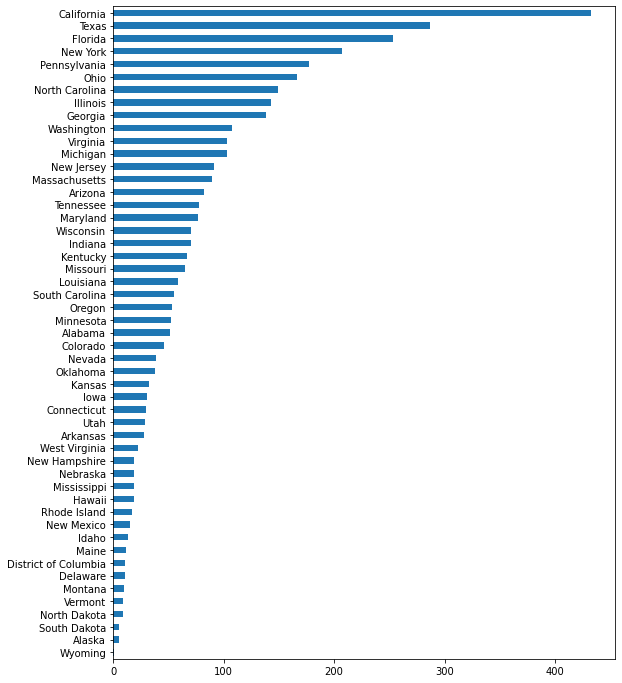

In [6]:
# Respondents by state
print('%s\n'%codebook['Q_state']['Q'])
fig,ax = plt.subplots(figsize=(9,12))
_ = sample_df['Q_state'].value_counts().sort_values().rename(
    codebook['Q_state']['choices']).plot.barh(ax=ax)
# print(sample_df['Q_state'].value_counts().sort_values().rename(codebook['Q_state']['choices']))

How does this compare to the US population distribution over states?

In [7]:
sample_state_pops = (sample_df['Q_state'].value_counts()
               .rename(codebook['Q_state']['choices'])
               .sort_index())
print('sample from %s states' % len(sample_state_pops))
sample_state_pops.head()

sample from 51 states


Alabama        51
Alaska          5
Arizona        82
Arkansas       28
California    433
Name: Q_state, dtype: int64

## US Census Data for 2022 populations

Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2022				

This data was downloaded from:
https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

Full spreadsheet, which contains 2020-2022 data is here: [link](https://docs.google.com/spreadsheets/d/1n6VYxJZohjohD76qaArUlVfJIW9T9fT7LSGou5PAQG4/edit#gid=1200857888)

Below is 2022 state population data only.


Suggested Citation:
> Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2022 (NST-EST2022-POP)				
Source: U.S. Census Bureau, Population Division				
Release Date: December 2022

Downloaded January 2023

In [8]:
census2022_populations = pd.read_csv(
    '../data/US-census-state-populations-2022.csv'
).rename(columns={'population':'census_2022_pop'}).set_index('State')
census2022_total = census2022_populations['census_2022_pop'].sum()
print('total population = %s' % census2022_total)
census2022_populations['(US %)'] = census2022_populations['census_2022_pop'].apply(
    lambda p: '(%0.2f%%)'% (100*(p/census2022_total)))
census2022_populations.head()

total population = 336509346


,census_2022_pop,(US %)
State,,
Alabama,5074296,(1.51%)
Alaska,733583,(0.22%)
Arizona,7359197,(2.19%)
Arkansas,3045637,(0.91%)
California,39029342,(11.60%)


In [9]:
census2022_populations['sample_pop'] = census2022_populations.index.map(
    sample_state_pops
).fillna(0).astype(int)
census2022_populations['(sample %)'] = census2022_populations['sample_pop'].apply(
    lambda p: '(%0.2f%%)'% (100*(p/N)))
display(census2022_populations)
census2022_populations.to_latex()

,census_2022_pop,(US %),sample_pop,(sample %)
State,,,,
Alabama,5074296,(1.51%),51,(1.37%)
Alaska,733583,(0.22%),5,(0.13%)
Arizona,7359197,(2.19%),82,(2.21%)
Arkansas,3045637,(0.91%),28,(0.75%)
California,39029342,(11.60%),433,(11.66%)
Colorado,5839926,(1.74%),46,(1.24%)
Connecticut,3626205,(1.08%),30,(0.81%)
Delaware,1018396,(0.30%),11,(0.30%)
District of Columbia,671803,(0.20%),11,(0.30%)


'\\begin{tabular}{lrlrl}\n\\toprule\n{} &  census\\_2022\\_pop &    (US \\%) &  sample\\_pop & (sample \\%) \\\\\nState                &                  &           &             &            \\\\\n\\midrule\nAlabama              &          5074296 &   (1.51\\%) &          51 &    (1.37\\%) \\\\\nAlaska               &           733583 &   (0.22\\%) &           5 &    (0.13\\%) \\\\\nArizona              &          7359197 &   (2.19\\%) &          82 &    (2.21\\%) \\\\\nArkansas             &          3045637 &   (0.91\\%) &          28 &    (0.75\\%) \\\\\nCalifornia           &         39029342 &  (11.60\\%) &         433 &   (11.66\\%) \\\\\nColorado             &          5839926 &   (1.74\\%) &          46 &    (1.24\\%) \\\\\nConnecticut          &          3626205 &   (1.08\\%) &          30 &    (0.81\\%) \\\\\nDelaware             &          1018396 &   (0.30\\%) &          11 &    (0.30\\%) \\\\\nDistrict of Columbia &           671803 &   (0.20\\%) &          11 &    (0.30

Compute the correlation

In [10]:
print('Pearson correlation')
census2022_populations.corr().round(3)

Pearson correlation


,census_2022_pop,sample_pop
census_2022_pop,1.000,0.986
sample_pop,0.986,1.000


In [11]:
"""
Make a table representing aggregate characteristics of the sample
"""

sample_demos_cols = ['index', 'count', 'pct']
sample_demos_df = pd.DataFrame({}, columns=sample_demos_cols)
sample_demos_df

,index,count,pct


What is your gender?


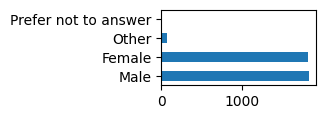

,index,count,pct
0,Male,1823,49.07
1,Female,1812,48.78
2,Other,68,1.83
3,Prefer not to answer,12,0.32


In [12]:
print('%s'%codebook['Q_gender']['Q'])
fig,ax = plt.subplots(figsize=(2,1), dpi=100)
_ = sample_df['Q_gender'].value_counts().sort_index().rename(codebook['Q_gender']['choices']).plot.barh(ax=ax)
plt.show()
gender_df = (sample_df['Q_gender'].value_counts()
          .sort_index().rename(codebook['Q_gender']['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
gender_df

In [13]:
sample_demos_df = pd.concat([sample_demos_df,gender_df])

Male vs non-male

In [14]:
# For gender, also add binary male vs non-male
sample_df['male'] = sample_df['Q_gender'].apply(lambda g: True if g=='1' else False)
sample_df['male'].value_counts()

False    1892
True     1823
Name: male, dtype: int64

Race: We put anyone who answered with 2 or more races in the 'Other' category

,index,count,pct
0,White,2662,71.66
1,Other,304,8.18
2,Asian,303,8.16
3,Black or African American,251,6.76
4,Hispanic or Latino,176,4.74
5,American Indian or Alaska Native,14,0.38
6,Native Hawaiian or Pacific Islander,5,0.13


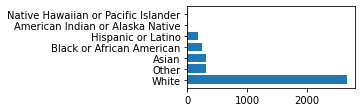

In [15]:
# Race: We put anyone who answered with 2 or more races in the 'Other' category
Q = 'Q_race'
# print(sample_df[Q].value_counts().sort_values())
sample_df['race'] = (sample_df[Q]
                       .apply(lambda r: r if r in ['1','2','3','4','5','6'] else '7')
                       .map(codebook[Q]['choices']))
race_df = (sample_df['race'].value_counts().sort_values(ascending=False)
    .to_frame(name='count').reset_index()
    .assign(pct=lambda x: round(100*x['count']/N, 2)))
fig,ax = plt.subplots(1,1,figsize=(3,1.5))
_ = ax.barh(race_df['index'], race_df['count'])
race_df

In [16]:
# Just add White alone category
sample_demos_df = pd.concat([sample_demos_df, pd.DataFrame(
    [race_df.loc[0].to_list()],
    columns=sample_demos_cols,
)])

In [17]:
sample_demos_df

,index,count,pct
0,Male,1823,49.07
1,Female,1812,48.78
2,Other,68,1.83
3,Prefer not to answer,12,0.32
0,White,2662,71.66


Age

How old are you?


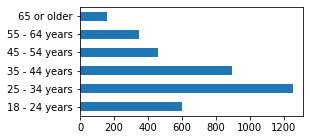

,index,count,pct
0,18 - 24 years,600,16.15
1,25 - 34 years,1253,33.73
2,35 - 44 years,897,24.15
3,45 - 54 years,457,12.30
4,55 - 64 years,350,9.42
5,65 or older,158,4.25


In [18]:
print('%s'%codebook['Q_age']['Q'])
fig,ax = plt.subplots(figsize=(4,2))
_ = sample_df['Q_age'].value_counts().sort_index().rename(codebook['Q_age']['choices']).plot.barh(ax=ax)
plt.show()
age_df = (sample_df['Q_age'].value_counts()
          .sort_index().rename(codebook['Q_age']['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
age_df

What is the median age?

U.S. Census estimates for median age: 38.3
> Source: Annual Estimates of the Resident Population for Selected Age Groups by Sex for the United States: April 1, 2020 to July 1, 2021 (NC-EST2021-AGESEX)
Source: U.S. Census Bureau, Population Division
Release Date: June 2022

In [28]:
print(codebook['Q_age']['choices'])
print('median age group: %s' % sample_df['Q_age'].astype(int).median())

{'1': '18 - 24 years', '2': '25 - 34 years', '3': '35 - 44 years', '4': '45 - 54 years', '5': '55 - 64 years', '6': '65 or older'}
median age group: 3.0


i.e. within 35 - 44 years

In [29]:
sample_demos_df = pd.concat([sample_demos_df, age_df])

What is the median income group for our sample?

For the U.S. population, Median household income (2017 - 2021 reported in 2021 dollars) is $69,021.

> Source: U.S. Census Bureau Quick Facks. https://www.census.gov/quickfacts/fact/table/US/PST045221 

In [34]:
Q = 'Q_income'
print(codebook[Q]['choices'])
print('median income group: %s' % sample_df[Q].astype(int).median())

{'1': 'Less than \\$25,000', '2': '\\$25,000 to \\$49,999', '3': '\\$50,000 to $74,999', '4': '\\$75,000 to \\$99,999', '5': '\\$100,000 to $149,999', '6': '\\$150,000 to \\$199,999', '7': '\\$200,000 or more'}
median income group: 3.0


i.e. \\$50,000 to \$74,999

What was your total household income in the previous year before taxes?


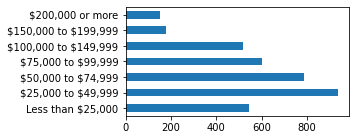

,index,count,pct
0,"Less than \$25,000",543,14.62
1,"\$25,000 to \$49,999",938,25.25
2,"\$50,000 to $74,999",786,21.16
3,"\$75,000 to \$99,999",602,16.20
4,"\$100,000 to $149,999",516,13.89
5,"\$150,000 to \$199,999",179,4.82
6,"\$200,000 or more",151,4.06


In [30]:
Q = 'Q_income'
print('%s'%codebook[Q]['Q'])
fig,ax = plt.subplots(figsize=(4,2))
_ = sample_df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
plt.show()
income_df = (sample_df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
income_df

In [17]:
sample_demos_df = pd.concat([sample_demos_df, income_df])

What if we were to combine income categories to:
- low income: Less than \$50,000
- medium income: \\$50,000 - $100,000
- high income: \$100,000 or more

,level,amount,count,pct
0,low_income,"Less than \$50,000",1481,39.87
1,med_income,"\$50,000 to $99,999",1388,37.36
2,high_income,"\$100,000 for more",846,22.77


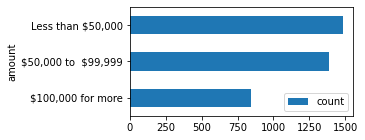

In [18]:
low_med_high_income_df = pd.DataFrame([
    ['low_income', 'Less than \$50,000'] +list(income_df.loc[0] + income_df.loc[1])[1:],
    ['med_income', '\$50,000 to  $99,999'] +list(income_df.loc[2] + income_df.loc[3])[1:],
    ['high_income', '\$100,000 for more'] +list(income_df.loc[4] + income_df.loc[5] + income_df.loc[6])[1:],
    
], columns=['level','amount','count','pct'])
fig,ax = plt.subplots(figsize=(4,2))
_ = low_med_high_income_df.sort_index(ascending=False).plot.barh('amount','count',ax=ax)
low_med_high_income_df

Residential area

Which best describes where you live?


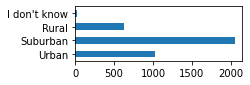

,index,count,pct
0,Urban,1020,27.46
1,Suburban,2047,55.10
2,Rural,626,16.85
3,I don't know,22,0.59


In [19]:
Q = 'Q_urban_rural'
print('%s'%codebook[Q]['Q'])
fig,ax = plt.subplots(figsize=(3,1))
_ = sample_df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
plt.show()
residential_area_df = (sample_df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
residential_area_df

In [20]:
sample_demos_df = pd.concat([sample_demos_df, residential_area_df])

What type of residence do you live in?


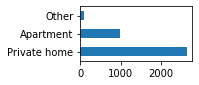

,index,count,pct
0,Private home,2644,71.17
1,Apartment,978,26.33
2,Other,93,2.50


In [21]:
Q = 'Q_residence_type'
print('%s'%codebook[Q]['Q'])
fig,ax = plt.subplots(figsize=(2,1))
_ = sample_df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
plt.show()
residential_type_df = (sample_df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
residential_type_df

In [22]:
sample_demos_df = pd.concat([sample_demos_df, residential_type_df])

We also include frequency of online shopping since it makes its way into further analysis as a consumer level variable.

How often (on average) do you make online shopping purchases?


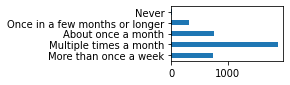

,index,count,pct
0,More than once a week,744,20.03
1,Multiple times a month,1893,50.96
2,About once a month,757,20.38
3,Once in a few months or longer,312,8.40
4,Never,9,0.24


In [23]:
Q = 'Q_online_shopping'
print('%s'%codebook[Q]['Q'])
fig,ax = plt.subplots(figsize=(2,1))
_ = sample_df[Q].value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
plt.show()
freq_ecommerce_df = (sample_df[Q].value_counts()
          .sort_index().rename(codebook[Q]['choices'])
          .to_frame(name='count').reset_index()
          .assign(pct=lambda x: round(100*x['count']/N, 2)))
freq_ecommerce_df

In [24]:
sample_demos_df = pd.concat([sample_demos_df, freq_ecommerce_df])

In [25]:
sample_demos_df.set_index('index')

,count,pct
index,,
Male,1823,49.07
Female,1812,48.78
Other,68,1.83
Prefer not to answer,12,0.32
White,2662,71.66
18 - 24 years,600,16.15
25 - 34 years,1253,33.73
35 - 44 years,897,24.15
45 - 54 years,457,12.30


In [26]:
# combined gender: other and prefer not to answer:
sample_demos_df.iloc[[2,3]].sum()

index    OtherPrefer not to answer
count                           80
pct                           2.15
dtype: object

## Distribution of use of delivery for different vendors by demographics


How many participants would not order delivery from any of the vendors v0-v3, and who are they?


We ask participants how often / whether they would order from the different vendor types.

Based on their answer, within the Qualtrics survey logic, an embedded boolean field is set in the survey data.

In [27]:
# convert embedded data booleans from strings to booleans
v_delivery_embedded_fields = [
    'takeout_food_delivery',
    'prescription_medications_delivery',
    'last_minute_groceries_delivery',
    'liquor_store_delivery',
]
for f in v_delivery_embedded_fields:
    sample_df[f] = sample_df[f].map({'False':False,'True':True})

In [28]:
never_v_delivery_df = sample_df[~sample_df[v_delivery_embedded_fields].any(axis='columns')]
N_never_v_delivery = len(never_v_delivery_df)
print('%0.3f = %s/%s indicated they would not do delivery for any vendor type' % (
    N_never_v_delivery/N, N_never_v_delivery, N))

0.024 = 90/3715 indicated they would not do delivery for any vendor type


Who are these people? 
Do they ever do online shopping? How often vs the others?

Overall they do less online shopping than the general population

How often (on average) do you make online shopping purchases?


,all,no v deliveries
More than once a week,20.0,5.6
Multiple times a month,51.0,38.9
About once a month,20.4,40.0
Once in a few months or longer,8.4,13.3
Never,0.2,2.2


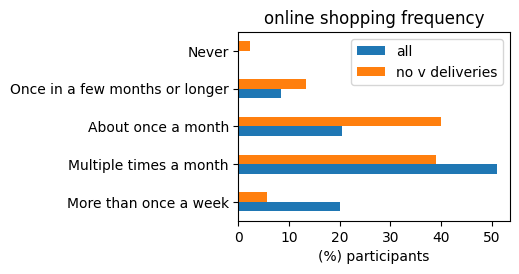

In [29]:
Q = 'Q_online_shopping'
print('%s'%codebook[Q]['Q'])
fig,ax = plt.subplots(figsize=(3.5,2.5),dpi=100)
online_shopping_freq_df = 100*(sample_df[Q].value_counts()
     .sort_index().rename(codebook[Q]['choices'])
     .to_frame(name='all')/len(sample_df)
).round(3)
online_shopping_freq_df['no v deliveries'] = 100*(never_v_delivery_df[Q].value_counts()
     .sort_index().rename(codebook[Q]['choices'])/len(never_v_delivery_df)
).round(3)
online_shopping_freq_df.plot(kind='barh',y=['all','no v deliveries'],ax=ax)
ax.set_title('online shopping frequency')
ax.set_xlabel('(%) participants')
online_shopping_freq_df

In [30]:
# never_v_delivery_df

Create a table representing the percent of each demographic group from the sample that do / would order delivery for each vendor type:
```
demographic, all, none, online shopping, v0: take-out food, v1: prescription meds,  v2: liquor store, v3: groceries
```

In [31]:
def get_yes_delivery_row(df):
    """
    Returns row representing the fraction of the population in the dataframe that is:
    all, none, v0: take-out food, v1: prescription meds,  v2: liquor store, v3: groceries
    """
    return pd.Series([
        len(df[df[v_delivery_embedded_fields].all(axis='columns')])/len(df),
        len(df[~df[v_delivery_embedded_fields].any(axis='columns')])/len(df),
        (df['takeout_food_delivery']==True).sum()/len(df),
        (df['prescription_medications_delivery']==True).sum()/len(df),
        (df['liquor_store_delivery']==True).sum()/len(df),
        (df['last_minute_groceries_delivery']==True).sum()/len(df),
    ], index=[
        'all',
        'none',
        '(v0) take-out food',
        '(v1) prescription medications',
        '(v2) liquor store',
        '(v3) groceries',
    ]).round(3)

In [32]:
yes_delivery_df = get_yes_delivery_row(sample_df).rename('Total').to_frame().transpose()
yes_delivery_df

,all,none,(v0) take-out food,(v1) prescription medications,(v2) liquor store,(v3) groceries
Total,0.427,0.024,0.811,0.894,0.641,0.694


In [33]:
yes_delivery_df.loc['Gender'] = ['' for c in range(len(yes_delivery_df.columns))]
yes_delivery_df.loc['Male'] = get_yes_delivery_row(sample_df[sample_df['male']==True])
yes_delivery_df.loc['Non-male'] = get_yes_delivery_row(sample_df[sample_df['male']==False])
# yes_delivery_df

In [34]:
# Add attributes from other questions
titles_Qs = [
    ('Income','Q_income'), ('Age','Q_age'), 
    ('Residence area','Q_urban_rural'), ('Residence type','Q_residence_type')
]
for title, Q in titles_Qs:
    yes_delivery_df.loc[title] = ['' for c in range(len(yes_delivery_df.columns))]
    for k, v in codebook[Q]['choices'].items():
        df = sample_df[sample_df[Q]==k]
        yes_delivery_df.loc[v] = get_yes_delivery_row(sample_df[sample_df[Q]==k])
# yes_delivery_df

In [35]:
# Add frequency of online shopping
yes_delivery_df.loc['Online shopping frequency'] = ['' for c in range(len(yes_delivery_df.columns))]
Q = 'Q_online_shopping'
for k, v in codebook[Q]['choices'].items():
    df = sample_df[sample_df[Q]==k]
    yes_delivery_df.loc[v] = get_yes_delivery_row(sample_df[sample_df[Q]==k])

yes_delivery_df

,all,none,(v0) take-out food,(v1) prescription medications,(v2) liquor store,(v3) groceries
Total,0.427,0.024,0.811,0.894,0.641,0.694
Gender,,,,,,
Male,0.416,0.026,0.82,0.884,0.646,0.669
Non-male,0.437,0.023,0.803,0.905,0.636,0.718
Income,,,,,,
"Less than \$25,000",0.357,0.033,0.744,0.893,0.599,0.65
"\$25,000 to \$49,999",0.414,0.029,0.805,0.892,0.638,0.68
"\$50,000 to $74,999",0.445,0.017,0.821,0.899,0.662,0.726
"\$75,000 to \$99,999",0.429,0.025,0.824,0.902,0.618,0.688
"\$100,000 to $149,999",0.467,0.025,0.831,0.886,0.659,0.723


Note: The reason for the repeated 0.222 values is that there are only 9 people in the sample who are in the Never category for online shopping.

Not so unlikely then that value of 2 happened multiple times.
2/9 = .222

#### Observations

(From just eye-balling the data; sample demographics above should also be considered.)

- people most likely to consider prescription medications for delivery; least likely for liquor store
- gender: not a differentiator 
- frequency of online shopping: people who online shop more often are more likely to order delivery from any/all of the vendors
- rural residence: people who live in rural areas more often say they never order take-out delivery (also reflected in comments)
- age: older people more often say they never order take-out delivery

#### Plots

TODO for better understanding? 
Plots representing the frequency of delivery for each demographic.

## Distribution of frequency of delivery & why not do delivery?

In [36]:
vQs = {
    'online shopping (Not a studied vendor type)': 'Q_online_shopping',
    'v0': 'Q_takeout_food',
    'v1': 'Q_v_1',
    'v2': 'Q_v_2',
    'v3': 'Q_online_groceries'
}

online shopping (Not a studied vendor type):
How often (on average) do you make online shopping purchases?


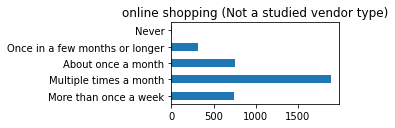

v0:
How often (on average) do you have take-out food delivered to your home?


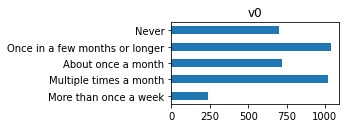

v1:
Suppose there is a company that specializes in delivering prescription medications and offers service in your area, and the total price is similar to local pharmacies. If you needed prescription medications, would you ever order them from this company for delivery to your home?


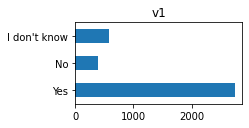

v2:
Would you ever order items from a liquor store for delivery to your home?


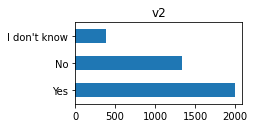

v3:
How often (on average) do you purchase your groceries online?


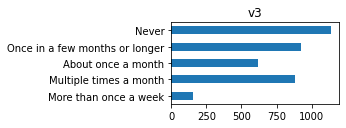

In [37]:
for v, Q in vQs.items():
    print('%s:'%v)
    print('%s'%codebook[Q]['Q'])
    fig,ax = plt.subplots(figsize=(3,1.5))
    _ = sample_df[Q].astype(str).value_counts().sort_index().rename(codebook[Q]['choices']).plot.barh(ax=ax)
    ax.set_title(v)
    plt.show()
    df = (sample_df[Q].astype(str).value_counts()
              .sort_index().rename(codebook[Q]['choices'])
              .to_frame(name='count')
              .assign(pct=lambda x: round(100*x['count']/N, 2)))
    #display(df)

### Reasons people do/would not order delivery

### v0 Take-out food

In [38]:
Q = 'Q_takeout_food'
why_no = 'Q_v_0_why_no'
# '5':'Never'
never_choice = '5'
print(codebook[Q]['Q'])
# print(codebook[Q]['choices'][never_choice])
v0_never_rdf = sample_df[sample_df[Q].astype(str)==never_choice]
print('n=%s'%len(v0_never_rdf))

# why no?
print('Reason')
print('Reference:')
display(pd.DataFrame(
    [[val, reason] for val,reason in codebook_why_no['choices'].items()],
    columns=['value','reason']
).set_index('value'))
print('Responses:')
display(v0_never_rdf[why_no].value_counts().sort_values())

print('write-ins for other:')
for other_reason in v0_never_rdf['Q_v_0_why_no_4_TEXT'].dropna():
    print(other_reason)

# v0_never_rdf.head()

How often (on average) do you have take-out food delivered to your home?
n=701
Reason
Reference:


,reason
value,
1,I prefer the in-store experience
2,I want to avoid potential delivery fees or add...
3,I want to avoid potential delays
4,Other


Responses:


1,4          2
1,2,4        4
1,2,3,4      5
2,3,4       10
3           12
1,2,3       30
2,4         36
1,2         46
1           51
2,3         74
4          158
2          273
Name: Q_v_0_why_no, dtype: int64

write-ins for other:
Most Places dont deliver to my home
Don’t think the food will be as fresh.
I live in a rural area
Eating out is too expensive plus adding on delivery fees makes it even more impractical.
I live in a rural area with no food delivery services.
The local restaurants don't provide delivery.
MAking my own food is cheaper and I don't like strange idiots handling my food
There is no service available that delivers to my area.
they dont deliver to my area
my house is too far from any restaurants
Nobody delivers to where we live
Don't have the option 
I home cook. 
It's hard for me to meet the minimum order.
We mostly cook our own food
Covid + other diseases + cheaper not too
I live in a rural area and it id not available
I live pretty far away from town so the vast majority of places do not deliver to my home.
Much rather go out than eat take-out food at home.
I do not eat restaurant food
Cold food
Food delivery apps don't deliver to where we live.
I live too far away for 

### v1 - prescription medications

In [39]:
Q = 'Q_v_1'
why_no = 'Q_v_1_why_no'
why_no_text = 'Q_v_1_why_no_4_TEXT'
# '2':'No'
never_choice = '2'
print(codebook[Q]['Q'])
print(codebook[Q]['choices'][never_choice])
v_never_rdf = sample_df[sample_df[Q].astype(str)==never_choice]
print('n=%s'%len(v_never_rdf))

# why no?
print('Reason')
print('Reference:')
display(pd.DataFrame(
    [[val, reason] for val,reason in codebook_why_no['choices'].items()],
    columns=['value','reason']
).set_index('value'))
print('Responses:')
display(v_never_rdf[why_no].value_counts().sort_values())

print('write-ins for other:')
for other_reason in v_never_rdf[why_no_text].dropna():
    print(other_reason)

# v_never_rdf.head()

Suppose there is a company that specializes in delivering prescription medications and offers service in your area, and the total price is similar to local pharmacies. If you needed prescription medications, would you ever order them from this company for delivery to your home?
No
n=392
Reason
Reference:


,reason
value,
1,I prefer the in-store experience
2,I want to avoid potential delivery fees or add...
3,I want to avoid potential delays
4,Other


Responses:


1,3,4       2
1,2,4       2
1,2,3,4     4
3,4         5
2,3,4       7
1,4         8
1,2        10
1,3        11
2,4        13
1,2,3      28
3          36
2,3        48
1          61
2          63
4          94
Name: Q_v_1_why_no, dtype: int64

write-ins for other:
Don’t want my meds subject to the weather if I’m not home to receive them.
privacy concerns as medication is much more personal than food
My family doesn't have any prescription medications.
I don't take any prescriptions
Theft of important medication
going in the drive thru at walgreens is not that complicated or a bother for me to do now
Privacy concerns 
I wouldn't like someone else handling my medication.
We've looked into this for our area and it's difficult to set up refills for certain meds if the refill isn't automatically approved by our doctors.
I already have automatic prescription refills set up through my regular drug store.
privacy
dont trust my medicine with strangers
My health care provider already provides this service
I already get my medications delivered to my home by a pharmacy.
I have Medical Weed I have curbside and wear a RESPIRATOR not mouth diaper
I generally have to use a certain pharmacy
I would maybe like medical advice along with the m

In [40]:
Q = 'Q_v_2'
why_no = 'Q_v_2_why_no'
why_no_text = 'Q_v_2_why_no_4_TEXT'
# '2':'No'
never_choice = '2'
print(codebook[Q]['Q'])
print(codebook[Q]['choices'][never_choice])
v_never_rdf = sample_df[sample_df[Q].astype(str)==never_choice]
print('n=%s'%len(v_never_rdf))

# why no?
print('Reason')
print('Reference:')
display(pd.DataFrame(
    [[val, reason] for val,reason in codebook_why_no['choices'].items()],
    columns=['value','reason']
).set_index('value'))
print('Responses:')
display(v_never_rdf[why_no].value_counts().sort_values())

print('write-ins for other:')
for other_reason in v_never_rdf[why_no_text].dropna():
    print(other_reason)

# v_never_rdf.head()

Would you ever order items from a liquor store for delivery to your home?
No
n=1334
Reason
Reference:


,reason
value,
1,I prefer the in-store experience
2,I want to avoid potential delivery fees or add...
3,I want to avoid potential delays
4,Other


Responses:


3,4          2
1,2,3,4      3
2,3,4        3
1,3          7
1,2,4        8
1,4         11
3           23
2,4         32
1,2,3       33
2,3         53
1,2        103
1          229
2          263
4          564
Name: Q_v_2_why_no, dtype: int64

write-ins for other:
I don't do it often enough to warrant delivery
I don't drink alcohol. 
Everyone in the house is sober
I don’t drink alcohol
I don't drink.
I don't drink
I don't drink alcohol 
There aren't many services in my location that offer it
it is an unnecessary luxury
Don’t drink 
Don't drink alcohol
I don't drink alcohol
I don't drink
i dont use alcohol at all
Can’t drink, bad liver
I don't drink
I do not drink alcohol
I don't drink
Not interested in liquor
I don't drink liquor
I don’t drink. 
I don't drink
I rarely drink.
I don't drink liquor 
I don't want to risk damage to bottle from mishandling or the drink itself from possible heat exposure.
don't drink
I dont drink
I do not drink alcohol
I don't drink alcohol
I like to look at my options in person
The bottle might be destroyed in shipping
I do not drink
I don't drink
i don't drink alcohol
I don't drink alcohol.
I don't buy from liquor stores
I don't drink.
I don't drink liquor
I don't drink
I don't purchase liquor ev

In [41]:
Q = 'Q_online_groceries'
why_no = 'Q_v_3_why_no'
why_no_text = 'Q_v_3_why_no_4_TEXT'
# '5':'Never'
never_choice = '5'
print(codebook[Q]['Q'])
print(codebook[Q]['choices'][never_choice])
v_never_rdf = sample_df[sample_df[Q].astype(str)==never_choice]
print('n=%s'%len(v_never_rdf))

# We do not collect why not for the groceries

# v_never_rdf.head()

How often (on average) do you purchase your groceries online?
Never
n=1138


In [42]:
# sample_df[codebook.keys()].head()